In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
telco = pd.read_csv('F:\\telecom_data.csv')
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
telco.shape

(7043, 21)

Data Manipulation

In [4]:
telco.isnull().sum().values.sum() #no null values

0

In [5]:
telco.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [6]:
telco[['tenure','MonthlyCharges','TotalCharges']].head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.5
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


In [7]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
telco['TotalCharges'] = telco['TotalCharges'].replace(' ',np.nan)
telco[['tenure','MonthlyCharges','TotalCharges']][telco["TotalCharges"].isnull()==True].head(2) #contains NaN: need to impute

,tenure,MonthlyCharges,TotalCharges
488,0,52.55,NaN
753,0,20.25,NaN


In [9]:
nullvals = len(telco[['tenure','MonthlyCharges','TotalCharges']][telco["TotalCharges"].isnull()==True])
print('Percent of missing values:', nullvals*100/len(telco)) #0.15% data is missing

Percent of missing values: 0.15618344455487718


In [10]:
#For no tenure, there's monthly charge, so we will also impute the total charge as the monthly charge of the customer
telco['TotalCharges'][telco["TotalCharges"].isnull()==True] = telco.loc[:,('MonthlyCharges')]

#convert to float type
telco["TotalCharges"] = telco["TotalCharges"].astype(float)

In [11]:
cat_cols = telco.select_dtypes(include=['object'])
cat_cols = cat_cols.drop('customerID', axis=1)

for i in cat_cols:
    print(i,':',telco[i].unique().tolist())

gender : ['Female', 'Male']
Partner : ['Yes', 'No']
Dependents : ['No', 'Yes']
PhoneService : ['No', 'Yes']
MultipleLines : ['No phone service', 'No', 'Yes']
InternetService : ['DSL', 'Fiber optic', 'No']
OnlineSecurity : ['No', 'Yes', 'No internet service']
OnlineBackup : ['Yes', 'No', 'No internet service']
DeviceProtection : ['No', 'Yes', 'No internet service']
TechSupport : ['No', 'Yes', 'No internet service']
StreamingTV : ['No', 'Yes', 'No internet service']
StreamingMovies : ['No', 'Yes', 'No internet service']
Contract : ['Month-to-month', 'One year', 'Two year']
PaperlessBilling : ['Yes', 'No']
PaymentMethod : ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']
Churn : ['No', 'Yes']


In [12]:
for i in ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']:
    telco[i] = telco[i].replace({'No internet service' : 'No'})

In [13]:
telco["SeniorCitizen"] = telco["SeniorCitizen"].replace({1:"Yes",0:"No"})

In [14]:
def tenure_cat(telco) :
    if telco["tenure"] <= 12 :
        return "Tenure_0-12"
    elif (telco["tenure"] > 12) & (telco["tenure"] <= 24 ):
        return "Tenure_12-24"
    elif (telco["tenure"] > 24) & (telco["tenure"] <= 48) :
        return "Tenure_24-48"
    elif (telco["tenure"] > 48) & (telco["tenure"] <= 60) :
        return "Tenure_48-60"
    elif (telco["tenure"] > 60) :
        return "Tenure_gt_60"

telco["tenure_group"] = telco.apply(lambda telco:tenure_cat(telco),axis = 1)
telco.tenure_group.value_counts()

Tenure_0-12     2186
Tenure_24-48    1594
Tenure_gt_60    1407
Tenure_12-24    1024
Tenure_48-60     832
Name: tenure_group, dtype: int64

In [15]:
#Separating churn and non-churn customers
churn = telco[telco["Churn"] == "Yes"]
not_churn = telco[telco["Churn"] == "No"]

In [16]:
cat_cols = [x for x in ['SeniorCitizen']+list(cat_cols.columns) if x not in ['Churn']]
num_cols = [x for x in telco.columns if x not in cat_cols + ['Churn']+['customerID']+['SeniorCitizen']+['tenure_group']]

Exploratory Data Analysis

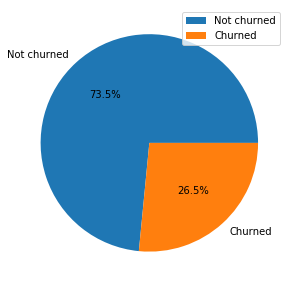

In [17]:
data = list(telco.Churn.value_counts().values)
label = ['Not churned','Churned']#list(telco.Churn.value_counts().index)
fig = plt.figure(figsize =(5, 5)) 

def func(pct, allvalues): 
    absolute = int(pct/100*np.sum(allvalues)) 
    return "{:.1f}%".format(pct, absolute) #{:.1f}%\n({:d})

plt.pie(data, 
        autopct = lambda pct: func(pct, data),
        labels = label) 
plt.legend(label, loc='best')
plt.show() #Imbalanced data

SeniorCitizen Distribution :


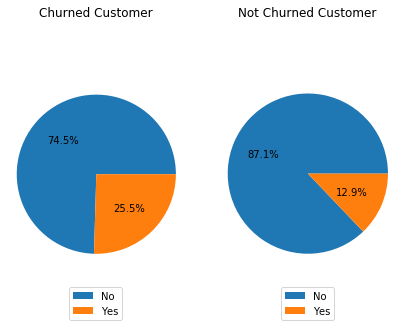

gender Distribution :


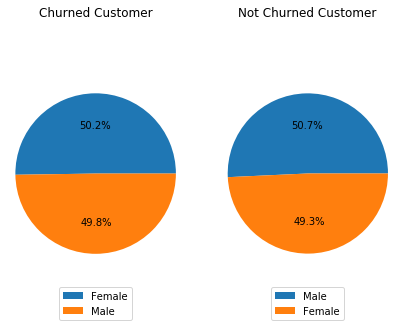

Partner Distribution :


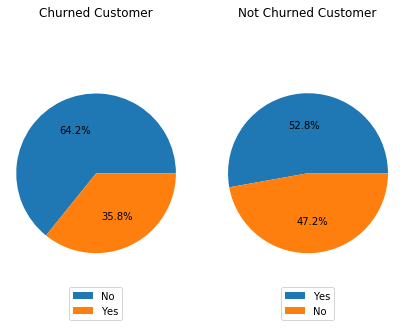

Dependents Distribution :


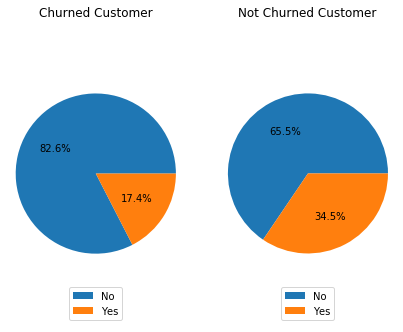

PhoneService Distribution :


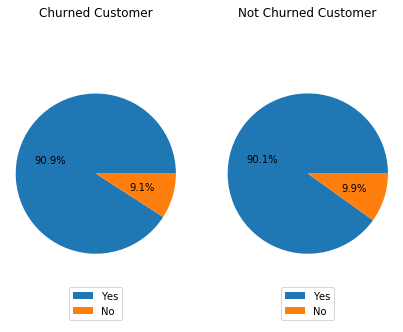

MultipleLines Distribution :


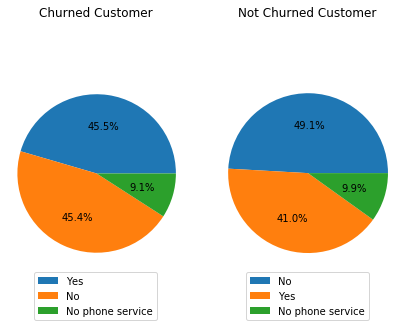

InternetService Distribution :


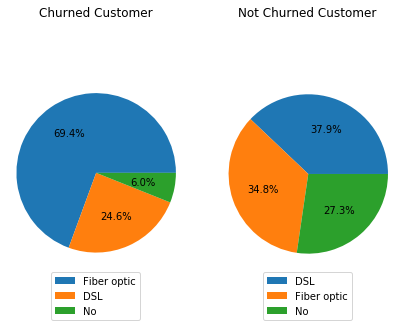

OnlineSecurity Distribution :


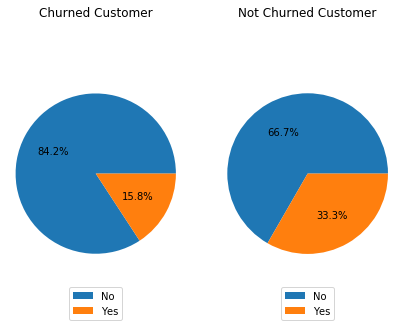

OnlineBackup Distribution :


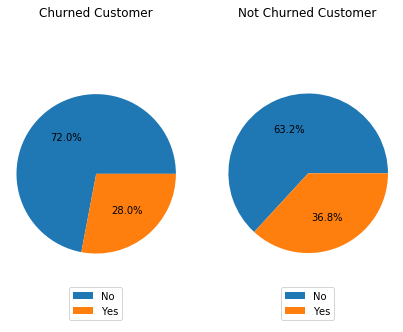

DeviceProtection Distribution :


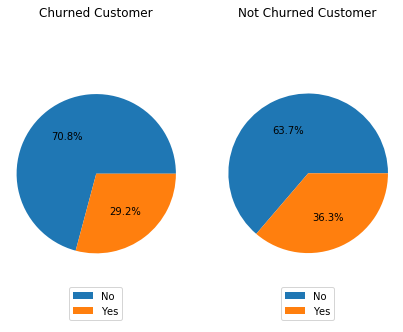

TechSupport Distribution :


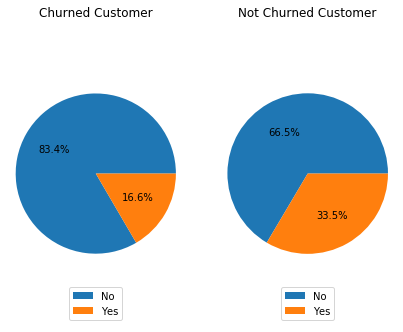

StreamingTV Distribution :


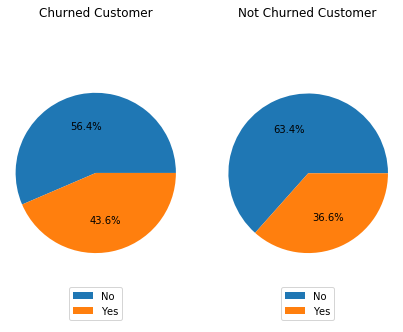

StreamingMovies Distribution :


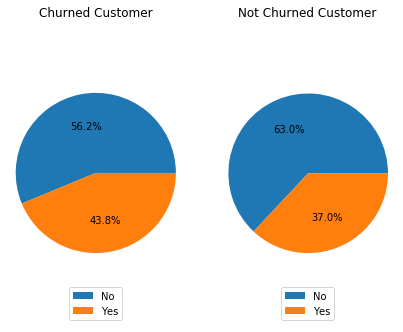

Contract Distribution :


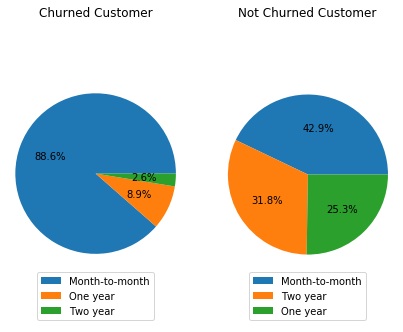

PaperlessBilling Distribution :


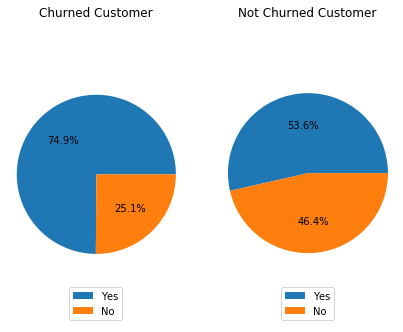

PaymentMethod Distribution :


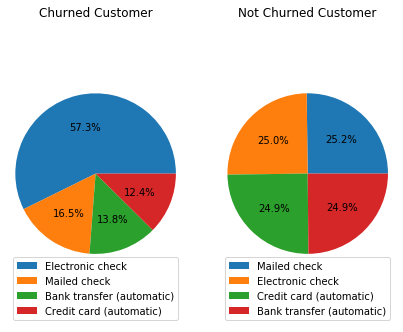

In [18]:
def plt_pie(col):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    plt.subplots_adjust(top=0.85,left=-0.4, bottom=-0.2, right=0.5)
    
    ax1.pie(list(churn[col].value_counts().values), 
        autopct = lambda pct: func(pct, list(churn[col].value_counts().values)),
        #labels = list(churn[col].value_counts().index),
        radius = .9) 
    ax1.axis('equal')
    ax1.set_title('Churned Customer')

    ax2.pie(list(not_churn[col].value_counts().values), 
        autopct = lambda pct: func(pct,  list(not_churn[col].value_counts().values)),
        #labels = list(not_churn[col].value_counts().index),
        radius = .9) 
    ax2.axis('equal')
    ax2.set_title('Not Churned Customer')
    
    lgd1 = ax1.legend(list(churn[col].value_counts().index), loc='lower center')
    lgd2 = ax2.legend(list(not_churn[col].value_counts().index), loc='lower center')

    plt.show()
    
for i in cat_cols :
    print(i+' Distribution :')
    plt_pie(i)

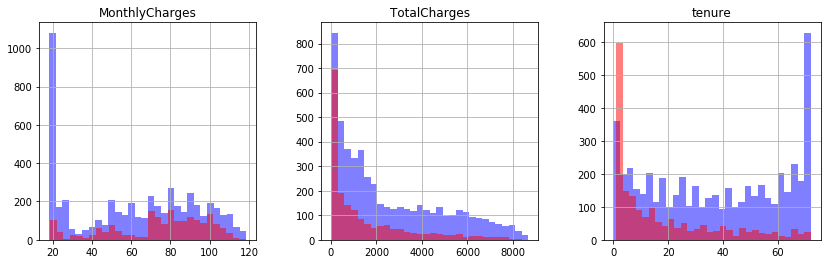

In [19]:
fig, ax = plt.subplots(1, 3, figsize=(14, 4))
telco[telco.Churn == "No"][num_cols].hist(bins=30, color="blue", alpha=0.5, ax=ax)
telco[telco.Churn == "Yes"][num_cols].hist(bins=30, color="red", alpha=0.5, ax=ax)
plt.show()

In [20]:
telco.loc[telco.Churn=='No','Churn'] = 0 
telco.loc[telco.Churn=='Yes','Churn'] = 1

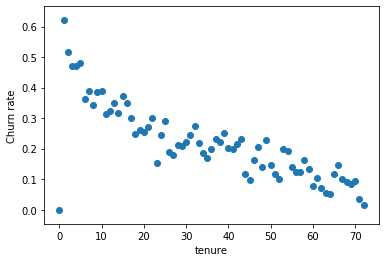

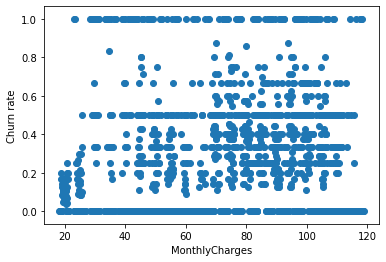

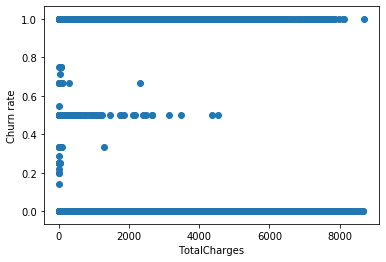

In [21]:
def plot_scatter(col):
    p = pd.to_numeric(telco['Churn']).groupby(telco[col]).mean().reset_index()
    plt.scatter(p[col], p.Churn)
    plt.ylabel('Churn rate')
    plt.xlabel(col)
    plt.show()

for i in num_cols:
    plot_scatter(i)

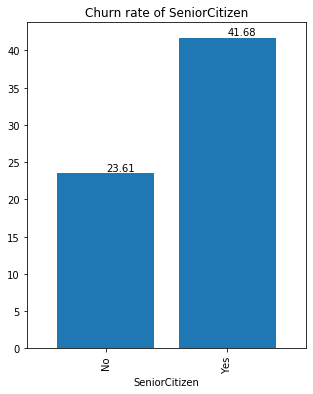

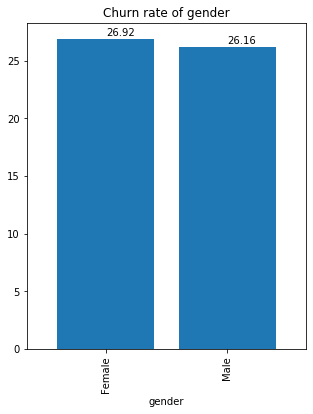

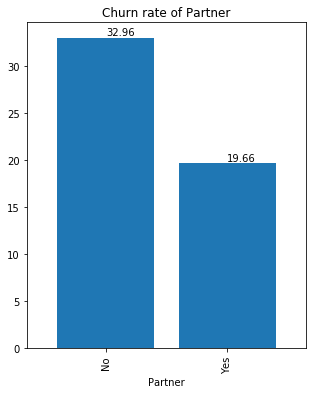

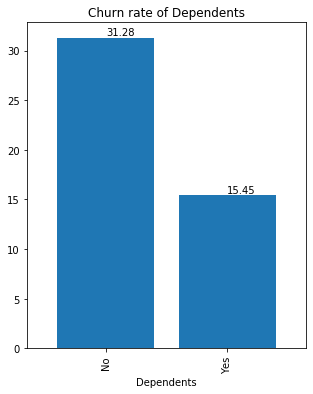

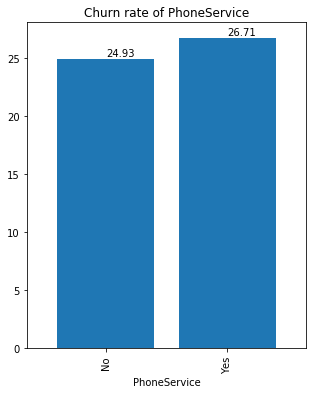

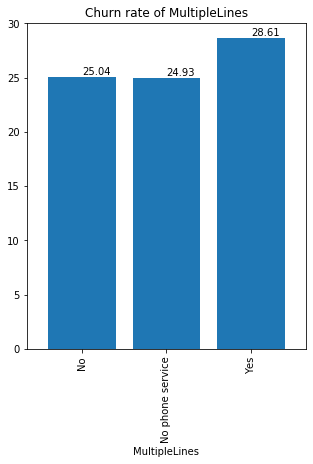

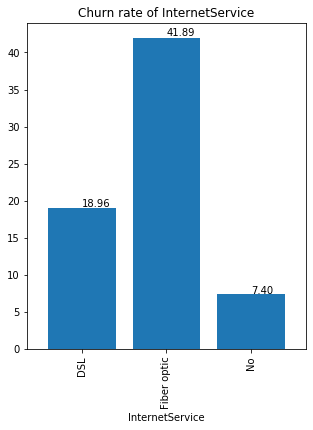

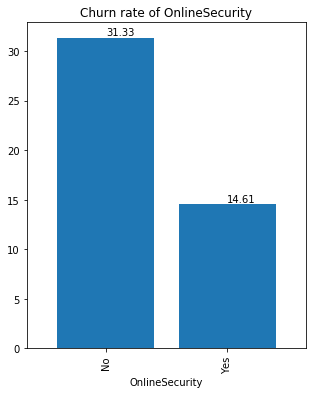

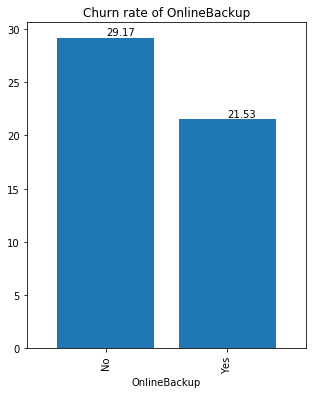

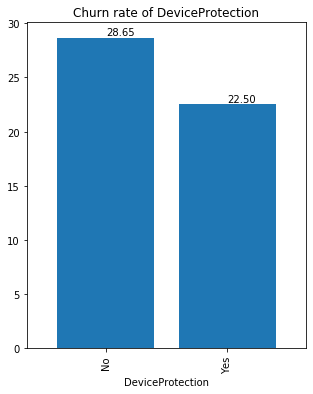

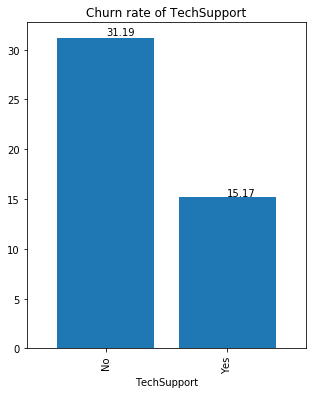

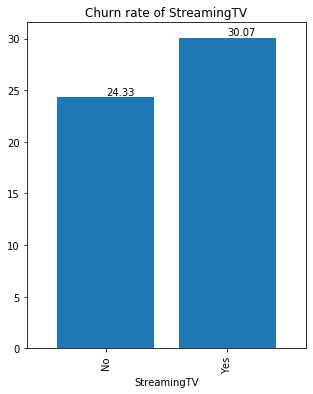

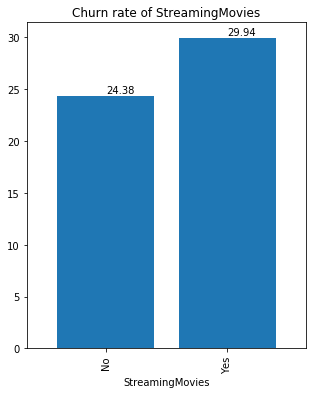

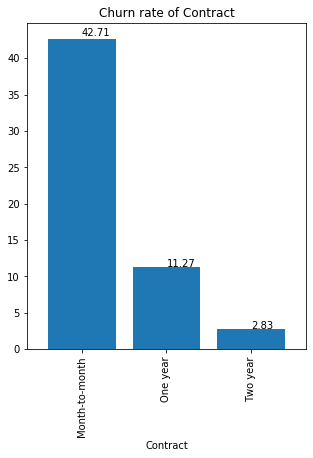

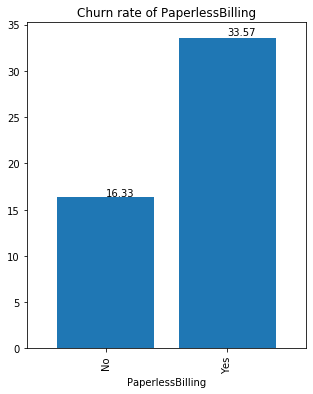

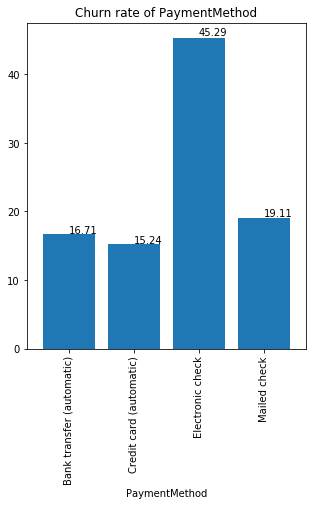

In [22]:
from decimal import Decimal

def plot_bar(col):
    df = pd.to_numeric(telco.Churn).groupby(telco[col]).mean()*100
    ax = df.plot(kind='bar', figsize=(5,6), width=0.8)
    for p in ax.patches:
        ax.annotate('{:.2f}'.format(Decimal(str(p.get_height()))),(p.get_x() + p.get_width()/2, p.get_y() + p.get_height()*1.01),fontsize=10)
    plt.title('Churn rate of '+col)
    plt.show()

for i in cat_cols:
    plot_bar(i)

In [23]:
telco.groupby('tenure_group').tenure.describe()

,count,mean,std,min,25%,50%,75%,max
tenure_group,,,,,,,,
Tenure_0-12,2186.0,4.731473,3.635911,0.0,1.0,4.0,8.0,12.0
Tenure_12-24,1024.0,18.351562,3.562792,13.0,15.0,18.0,22.0,24.0
Tenure_24-48,1594.0,36.191343,7.033533,25.0,30.0,36.0,42.0,48.0
Tenure_48-60,832.0,54.489183,3.437232,49.0,52.0,54.0,57.0,60.0
Tenure_gt_60,1407.0,68.110163,3.611457,61.0,65.0,69.0,72.0,72.0


In [24]:
telco.groupby('tenure_group').tenure.describe()['mean']

tenure_group
Tenure_0-12      4.731473
Tenure_12-24    18.351562
Tenure_24-48    36.191343
Tenure_48-60    54.489183
Tenure_gt_60    68.110163
Name: mean, dtype: float64

In [25]:
telco.groupby('tenure_group').MonthlyCharges.describe()

,count,mean,std,min,25%,50%,75%,max
tenure_group,,,,,,,,
Tenure_0-12,2186.0,56.097781,26.534608,18.75,25.2500,55.900,78.7875,112.95
Tenure_12-24,1024.0,61.357275,28.486603,18.80,30.1875,66.400,85.8250,112.95
Tenure_24-48,1594.0,65.930552,29.886345,18.25,39.1500,72.900,91.2375,117.45
Tenure_48-60,832.0,70.550781,30.562764,18.40,48.4875,77.775,96.8750,116.60
Tenure_gt_60,1407.0,75.952701,31.847094,19.10,54.6250,84.800,104.0250,118.75


<BarContainer object of 5 artists>

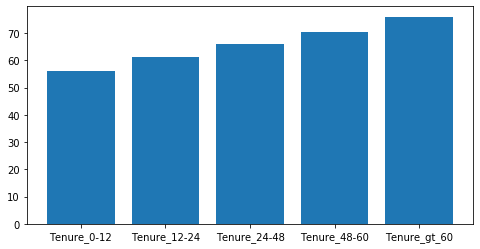

In [26]:
#Monthly charge for each tenure group
fig = plt.figure(figsize=(8,4))
plt.bar(telco.groupby('tenure_group').MonthlyCharges.describe()['mean'].index, telco.groupby('tenure_group').MonthlyCharges.describe()['mean'].values)

In [27]:
telco.groupby('tenure_group').TotalCharges.describe()

,count,mean,std,min,25%,50%,75%,max
tenure_group,,,,,,,,
Tenure_0-12,2186.0,275.438015,271.971085,18.80,70.4500,170.875,413.5500,1384.75
Tenure_12-24,1024.0,1126.257520,579.741950,218.55,566.4000,1148.550,1553.9625,2542.45
Tenure_24-48,1594.0,2390.451913,1221.693474,383.65,1299.5500,2402.575,3261.7625,5443.65
Tenure_48-60,832.0,3848.132572,1694.514387,900.90,2553.8375,4172.725,5237.0250,7049.50
Tenure_gt_60,1407.0,5180.669829,2209.248405,1123.65,3724.5750,5757.200,6913.8250,8684.80


<BarContainer object of 5 artists>

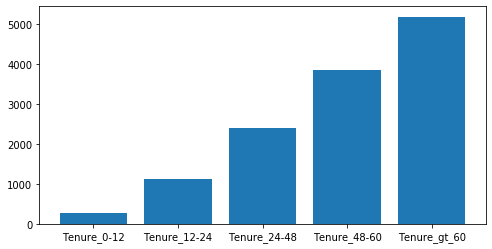

In [28]:
#Total Charge for each tenure group
fig = plt.figure(figsize=(8,4))
plt.bar(telco.groupby('tenure_group').TotalCharges.describe()['mean'].index, telco.groupby('tenure_group').TotalCharges.describe()['mean'].values)

<BarContainer object of 5 artists>

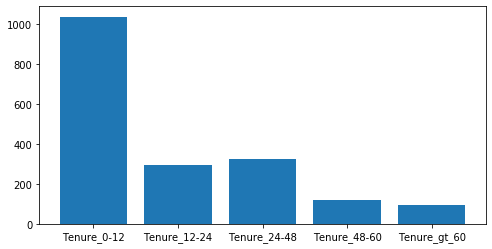

In [29]:
#Tenure vs Customer churn

fig = plt.figure(figsize=(8,4))
plt.bar(telco.groupby('tenure_group').Churn.sum().index,telco.groupby('tenure_group').Churn.sum().values)

In [30]:
binary_cols = telco.nunique()[telco.nunique()==2].index.to_list()
multi_cols = [i for i in cat_cols if i not in binary_cols]+['tenure_group']

In [31]:
telco_df = telco.copy()

In [32]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#Label encoding: binary columns
le = LabelEncoder()
for i in binary_cols :
    telco_df[i] = le.fit_transform(telco_df[i])

In [33]:
#One hot encoding: multiple columns
telco_df = pd.get_dummies(data=telco_df, columns=multi_cols)

In [34]:
#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(telco_df[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

telco_df = telco_df.drop(columns = num_cols,axis = 1)
telco_df = telco_df.merge(scaled,left_index=True,right_index=True,how = "left")

In [35]:
telco_df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Tenure_0-12,tenure_group_Tenure_12-24,tenure_group_Tenure_24-48,tenure_group_Tenure_48-60,tenure_group_Tenure_gt_60,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,0,1,0,0,0,1,0,0,...,1,0,1,0,0,0,0,-1.277445,-1.160323,-0.992667
1,5575-GNVDE,1,0,0,0,1,1,0,1,0,...,0,1,0,0,1,0,0,0.066327,-0.259629,-0.172198


In [36]:
telco_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
gender,7043.0,5.047565e-01,0.500013,0.000000,0.000000,1.000000,1.000000,1.000000
SeniorCitizen,7043.0,1.621468e-01,0.368612,0.000000,0.000000,0.000000,0.000000,1.000000
Partner,7043.0,4.830328e-01,0.499748,0.000000,0.000000,0.000000,1.000000,1.000000
Dependents,7043.0,2.995882e-01,0.458110,0.000000,0.000000,0.000000,1.000000,1.000000
PhoneService,7043.0,9.031663e-01,0.295752,0.000000,1.000000,1.000000,1.000000,1.000000
OnlineSecurity,7043.0,2.866676e-01,0.452237,0.000000,0.000000,0.000000,1.000000,1.000000
OnlineBackup,7043.0,3.448814e-01,0.475363,0.000000,0.000000,0.000000,1.000000,1.000000
DeviceProtection,7043.0,3.438875e-01,0.475038,0.000000,0.000000,0.000000,1.000000,1.000000
TechSupport,7043.0,2.902172e-01,0.453895,0.000000,0.000000,0.000000,1.000000,1.000000
StreamingTV,7043.0,3.843533e-01,0.486477,0.000000,0.000000,0.000000,1.000000,1.000000


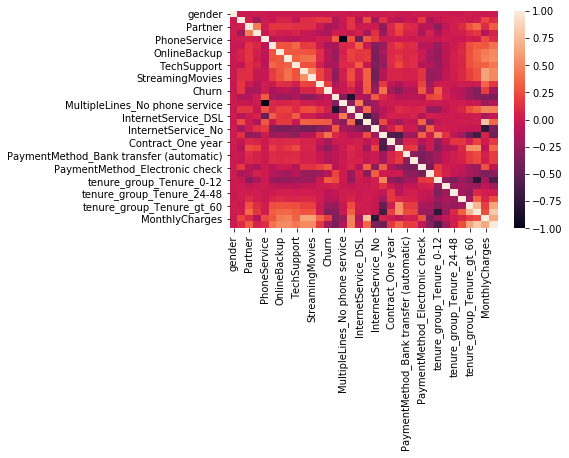

In [37]:
sns.heatmap(telco_df.corr())

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score,recall_score
from xgboost import XGBClassifier

train,test = train_test_split(telco_df,test_size=0.25,random_state=42)
cols    = [i for i in telco_df.columns if i not in ['customerID'] + ['Churn']]
train_X = train[cols]
train_Y = train['Churn']
test_X  = test[cols]
test_Y  = test['Churn']

In [39]:
import statsmodels.api as sm
from scipy import stats

glm_binom = sm.GLM(exog = train_X, endog = train_Y, family=sm.families.Binomial()).fit()
print(glm_binom.summary())

#if the absolute p-value is <0.05, it will significantly affect the Churn 
#coef parameeter  says how much each parameter will affect the Churn

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 5282
Model:                            GLM   Df Residuals:                     5254
Model Family:                Binomial   Df Model:                           27
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2183.5
Date:                Wed, 09 Sep 2020   Deviance:                       4366.9
Time:                        11:49:52   Pearson chi2:                 5.43e+03
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [40]:
np.exp(glm_binom.params) 

gender                                     0.964580
SeniorCitizen                              1.158956
Partner                                    1.029086
Dependents                                 0.861644
PhoneService                               0.591739
OnlineSecurity                             0.895425
OnlineBackup                               1.118726
DeviceProtection                           1.354770
TechSupport                                0.992896
StreamingTV                                2.152027
StreamingMovies                            2.418642
PaperlessBilling                           1.363884
MultipleLines_No                           0.571617
MultipleLines_No phone service             0.184930
MultipleLines_Yes                          1.035201
InternetService_DSL                        0.475996
InternetService_Fiber optic                4.818742
InternetService_No                         0.047709
Contract_Month-to-month                    1.034293
Contract_One

In [41]:
def score(model):
    mod = model
    mod.fit(train_X,train_Y)
    y_pred=mod.predict(test_X)
    print(str(mod) + ':')
    print('Accuracy on training set: {:.2f}'
           .format(mod.score(train_X, train_Y)))
    print('Accuracy on test set: {:.2f}'
           .format(mod.score(test_X[train_X.columns], test_Y)))
    model_roc_auc = roc_auc_score(test_Y,y_pred) 
    print ("Area under curve : ",model_roc_auc,"\n")
    print(classification_report(test_Y, y_pred)) 
    display(pd.crosstab(test_Y, y_pred, rownames=['Actual'], colnames=['Predicted']))
    print()

In [42]:
models = [LogisticRegression(), RandomForestClassifier(n_estimators= 1000), GradientBoostingClassifier(), XGBClassifier()]
for i in models:
    score(i)
    
# In Logistic regression: if our model says 100 customers will churn, 69 customers will actually churn(precision).There are around 220 customers who will actually churn (recall)

LogisticRegression():
Accuracy on training set: 0.81
Accuracy on test set: 0.81
Area under curve :  0.7171523812935816 

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1282
           1       0.69      0.52      0.59       479

    accuracy                           0.81      1761
   macro avg       0.76      0.72      0.73      1761
weighted avg       0.80      0.81      0.80      1761



Predicted,0,1
Actual,,
0,1167,115
1,228,251



RandomForestClassifier(n_estimators=1000):
Accuracy on training set: 1.00
Accuracy on test set: 0.79
Area under curve :  0.6898749018854283 

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1282
           1       0.67      0.47      0.55       479

    accuracy                           0.79      1761
   macro avg       0.75      0.69      0.71      1761
weighted avg       0.78      0.79      0.78      1761



Predicted,0,1
Actual,,
0,1172,110
1,256,223



GradientBoostingClassifier():
Accuracy on training set: 0.83
Accuracy on test set: 0.80
Area under curve :  0.7094554763401392 

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1282
           1       0.68      0.51      0.58       479

    accuracy                           0.80      1761
   macro avg       0.76      0.71      0.73      1761
weighted avg       0.79      0.80      0.79      1761



Predicted,0,1
Actual,,
0,1166,116
1,235,244



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None):
Accuracy on training set: 0.94
Accuracy on test set: 0.78
Area under curve :  0.6908267353658656 

              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1282
           1       0.63      0.49      0.55       479

    accuracy                           0.78      1761
   macro avg       0.73      0.69      0.70      1761
weighted avg       0.77      0.78      0.77  

Predicted,0,1
Actual,,
0,1145,137
1,245,234


In [43]:
# from imblearn.over_sampling import SMOTE

# cols    = [i for i in telco_df.columns if i not in ['customerID']+['Churn']]
# smote_X = telco_df[cols]
# smote_Y = telco_df['Churn']
# #Split train and test data
# smote_train_X,smote_test_X,smote_train_Y,smote_test_Y = train_test_split(smote_X,smote_Y,test_size =0.25,random_state = 111)
# os = SMOTE(random_state = 0)
# os_smote_X,os_smote_Y = os.fit_sample(smote_train_X,smote_train_Y)
# os_smote_X = pd.DataFrame(data = os_smote_X,columns=cols)
# os_smote_Y = pd.DataFrame(data = os_smote_Y,columns=['Churn'])

Random over-sampling:
1    5174
0    5174
Name: Churn, dtype: int64


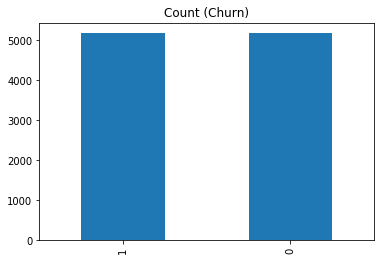

In [44]:
#Upsampling data: Using Random Oversampling technique

count_class_0, count_class_1 = telco_df.Churn.value_counts()

# Divide by class
df_class_0 = telco_df[telco_df['Churn'] == 0]
df_class_1 = telco_df[telco_df['Churn'] == 1]

df_class_1_over = df_class_1.sample(count_class_0, replace=True)
telco_oversampled = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(telco_oversampled.Churn.value_counts())
telco_oversampled.Churn.value_counts().plot(kind='bar', title='Count (Churn)')

train_sm,test_sm = train_test_split(telco_oversampled,test_size=0.25,random_state=42)
cols    = [i for i in telco_df.columns if i not in ['customerID'] + ['Churn']]
train_X = train_sm[cols]
train_Y = train_sm['Churn']
test_X  = test_sm[cols]
test_Y  = test_sm['Churn']

def score_sm(model):
    mod = model
    mod.fit(train_X,train_Y)
    y_pred=mod.predict(test_X)
    print(str(mod) + ':')
    print('Accuracy on training set: {:.2f}'
           .format(mod.score(train_X, train_Y)))
    print('Accuracy on test set: {:.2f}'
           .format(mod.score(test_X[train_X.columns], test_Y)))
    model_roc_auc = roc_auc_score(test_Y,y_pred) 
    print ("Area under curve : ",model_roc_auc,"\n")
    print(classification_report(test_Y, y_pred)) 
    display(pd.crosstab(test_Y, y_pred, rownames=['Actual'], colnames=['Predicted']))
    print()

In [45]:
for i in models:
    score_sm(i)

LogisticRegression():
Accuracy on training set: 0.77
Accuracy on test set: 0.77
Area under curve :  0.766074516350452 

              precision    recall  f1-score   support

           0       0.79      0.73      0.76      1319
           1       0.74      0.80      0.77      1268

    accuracy                           0.77      2587
   macro avg       0.77      0.77      0.77      2587
weighted avg       0.77      0.77      0.77      2587



Predicted,0,1
Actual,,
0,963,356
1,251,1017



RandomForestClassifier(n_estimators=1000):
Accuracy on training set: 1.00
Accuracy on test set: 0.90
Area under curve :  0.8989483955678113 

              precision    recall  f1-score   support

           0       0.95      0.85      0.89      1319
           1       0.86      0.95      0.90      1268

    accuracy                           0.90      2587
   macro avg       0.90      0.90      0.90      2587
weighted avg       0.90      0.90      0.90      2587



Predicted,0,1
Actual,,
0,1119,200
1,64,1204



GradientBoostingClassifier():
Accuracy on training set: 0.80
Accuracy on test set: 0.78
Area under curve :  0.7840303570958783 

              precision    recall  f1-score   support

           0       0.82      0.74      0.78      1319
           1       0.75      0.83      0.79      1268

    accuracy                           0.78      2587
   macro avg       0.79      0.78      0.78      2587
weighted avg       0.79      0.78      0.78      2587



Predicted,0,1
Actual,,
0,975,344
1,217,1051



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None):
Accuracy on training set: 0.95
Accuracy on test set: 0.86
Area under curve :  0.8632370139887067 

              precision    recall  f1-score   support

           0       0.92      0.80      0.86      1319
           1       0.82      0.93      0.87      1268

    accuracy                           0.86      2587
   macro avg       0.87      0.86      0.86      2587
weighted avg       0.87      0.86      0.86  

Predicted,0,1
Actual,,
0,1056,263
1,94,1174


In [46]:
# from xgboost import plot_importance
# fig, ax = plt.subplots(figsize=(10,8))
# plot_importance(xgb_model, ax=ax)

In [47]:
mod = RandomForestClassifier()
mod.fit(train_X,train_Y)
telco_df['proba'] = mod.predict_proba(telco_df[train_X.columns])[:,1]

In [48]:
telco_df[['customerID','proba']].head(10)

,customerID,proba
0,7590-VHVEG,0.73
1,5575-GNVDE,0.02
2,3668-QPYBK,0.98
3,7795-CFOCW,0.00
4,9237-HQITU,0.99
5,9305-CDSKC,1.00
6,1452-KIOVK,0.62
7,6713-OKOMC,0.07
8,7892-POOKP,0.78
9,6388-TABGU,0.02


In [49]:
telco_df.proba.describe()

count    7043.000000
mean        0.328351
std         0.373802
min         0.000000
25%         0.030000
50%         0.140000
75%         0.710000
max         1.000000
Name: proba, dtype: float64

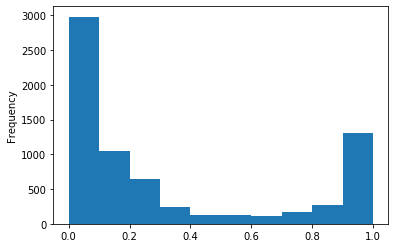

In [50]:
telco_df['proba'].plot(kind='hist')

In [51]:
telco_df[['customerID','Churn','proba']][(telco_df['proba']>=0.5) & (telco_df['Churn']==0)].head(10)
#According to data, these customers are not churning customers but according to predicted result, probability of churning out is more than 50%

,customerID,Churn,proba
0,7590-VHVEG,0,0.730000
6,1452-KIOVK,0,0.620000
31,4929-XIHVW,0,0.850000
34,3413-BMNZE,0,0.550000
45,3714-NTNFO,0,0.760000
50,8012-SOUDQ,0,0.650000
65,5122-CYFXA,0,0.540000
100,6380-ARCEH,0,0.538929
124,7219-TLZHO,0,0.580000
128,3930-ZGWVE,0,0.561929
